In [2]:
import numpy as np

In [3]:
k = 2 # число товаров
n = 5 # число покупателей

In [4]:
# Генерация порогов покупателей
Q = np.random.random_sample(size=[n, k])

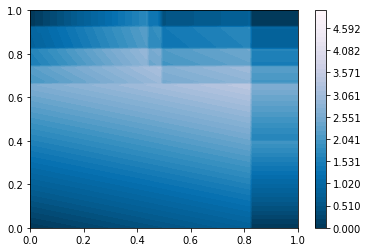

In [5]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm

N = 100
x = np.linspace(0.0, 1.0, N)
y = np.linspace(0.0, 1.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
#Z1 = np.exp(-X**2 - Y**2)
#Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
#z = nn.Sigmoid()(netD(torch.Tensor(list(zip(X.reshape(-1), Y.reshape(-1))))).view(100, 100)).detach().numpy()
z = [[sum([i if (q[1]>q[0] or q[0]<j)and q[1]>=i else j*(q[0]>=j) for q in Q]) for j in x] for i in y]
# Put in some negative values (lower left corner) to cause trouble with logs:
#z[:5, :5] = -0.1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
#z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, np.linspace(0.0, n, 50), locator=ticker.AutoLocator(), cmap=cm.PuBu_r)

# Alternatively, you can manually set the levels
# and the norm:
#lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
#levs = np.power(10, lev_exp)
#cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)

plt.show()

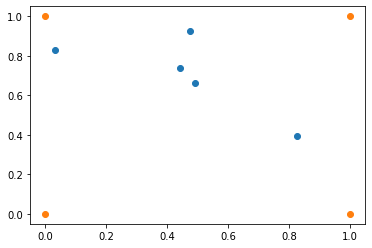

In [6]:
points = Q
plt.scatter(points[:, 0], points[:, 1])
corners = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
plt.scatter(corners[:, 0], corners[:, 1])

In [7]:
k = 10
n = 10

In [8]:
# Генерация порогов покупателей
Q = np.random.random_sample(size=[n, k])

In [9]:
lst = []
for i in range(n):
    for j in range(k):
        lst.append([Q[i][j], i, j])

In [10]:
lst = sorted(lst, key = lambda x: x[0], reverse = True)

In [11]:
for e in lst:
    s = e[2]*'\t' + '%0.2f' % e[0] + '(%d)' % e[1]
    print(s)

1.00(7)
			0.99(7)
0.99(0)
0.99(6)
					0.98(2)
				0.97(7)
									0.95(7)
	0.93(5)
								0.91(3)
						0.89(3)
							0.88(0)
0.88(4)
						0.86(2)
					0.85(5)
								0.85(7)
0.85(9)
							0.84(7)
			0.84(6)
							0.83(5)
					0.83(8)
								0.79(8)
			0.79(3)
			0.78(9)
									0.76(3)
	0.71(1)
				0.70(8)
	0.68(7)
								0.66(6)
						0.66(8)
				0.65(1)
							0.64(1)
						0.63(0)
				0.63(0)
						0.57(1)
								0.57(2)
				0.55(6)
							0.55(3)
									0.55(1)
		0.54(5)
	0.54(4)
							0.53(8)
					0.53(0)
									0.49(6)
									0.49(5)
	0.48(2)
						0.48(6)
		0.43(0)
			0.41(0)
					0.41(6)
		0.40(2)
0.39(5)
					0.39(1)
							0.39(6)
					0.38(3)
							0.38(2)
		0.36(4)
								0.35(1)
			0.34(8)
					0.33(7)
					0.33(9)
				0.32(4)
								0.31(5)
									0.31(2)
						0.31(4)
									0.30(0)
		0.30(3)
								0.29(9)
									0.28(4)
			0.27(4)
	0.27(6)
0.25(3)
		0.22(1)
				0.21(5)
			0.21(2)
		0.19(7)
				0.18(2)
				0.17(9)
						0.17(9)
								0.1

In [12]:
A = set(range(k))
for i, e in enumerate(lst):
    if e != -1 and e[2] in A:
        A.remove(e[2])
        for j, s in enumerate(lst[i+1:]):
            if e != -1 and s != -1 and s[1] == e[1]:
                lst[i+j+1] = -1

In [13]:
custom = np.zeros(n)
count = [0 for i in range(k)]
for e in lst:
    if e != -1:
        count[e[2]] += 1
        custom[e[1]] += 1
custom.sort()
custom

array([1., 1., 1., 1., 2., 2., 3., 3., 4., 8.])

In [17]:
from tqdm.notebook import tqdm
from copy import deepcopy

N = 100
k = 100
custom_all = np.zeros(k)
for _ in tqdm(range(N)):
    custom = np.zeros(k)
    Q = np.random.random_sample(size=[k, k])
    lst = []
    for i in range(k):
        for j in range(k):
            lst.append([Q[i][j], i, j])
    lst = sorted(lst, key = lambda x: x[0], reverse = True)
    lst = clean(lst, k)
    for e in lst:
        custom[e[1]] += 1
    custom.sort()
    custom_all += custom / N
custom_all

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.01,  1.02,  1.03,
        1.06,  1.12,  1.17,  1.22,  1.29,  1.42,  1.56,  1.68,  1.78,
        1.81,  1.87,  1.93,  1.99,  2.  ,  2.02,  2.07,  2.16,  2.25,
        2.32,  2.38,  2.59,  2.73,  2.84,  3.05,  3.2 ,  3.33,  3.53,
        3.75,  4.05,  4.29,  4.6 ,  5.02,  5.4 ,  5.99,  6.52,  7.33,
        8.09,  9.17, 10.55, 12.36, 14.81, 18.32, 22.71, 30.72, 44.99,
       73.68])

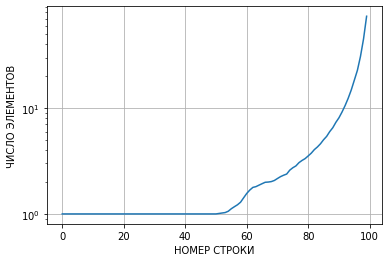

In [29]:
from matplotlib import pyplot as plt
plt.semilogy(custom_all)
plt.grid()
plt.xlabel('НОМЕР СТРОКИ')
plt.ylabel('ЧИСЛО ЭЛЕМЕНТОВ')
plt.show()
#plt.semilogy([(k-i)/(i+1) + 1 for i in range(k, 0, -1)])

In [76]:
prod = 1
for c in custom_all:
    prod *= c
prod

62795880144037.62

In [20]:
n**k

823543

In [21]:
for e in lst:
    if e != -1:
        s = e[2]*'\t' + '%0.2f' % e[0] + '(%d)' % e[1]
        print(s)

					0.99(2)
		0.97(5)
	0.97(0)
					0.95(3)
		0.91(3)
	0.91(4)
		0.88(4)
						0.84(4)
		0.72(1)
0.70(1)
				0.69(3)
		0.66(6)
	0.60(6)
				0.46(6)
0.44(6)
			0.30(6)


In [ ]:
# Идея с добавлением числа покупателей

In [16]:
from tqdm.notebook import tqdm
from copy import deepcopy

In [15]:
def clean(lst, k):
    A = set(range(k))
    lst1 = deepcopy(lst)
    for i, e in enumerate(lst1):
        if e != -1 and e[2] in A:
            A.remove(e[2])
            for j, s in enumerate(lst1[i+1:]):
                if e != -1 and s != -1 and s[1] == e[1]:
                    lst1[i+j+1] = -1
    return [x for x in lst1 if x != -1]

In [4]:
def reduce(lsts, k):
    out = []
    comp = set()
    for lst in tqdm(lsts):
        top = dict()
        A = set(range(k))
        for e in lst:
            if e[2] in A:
                A.remove(e[2])
                top.update({e[2]: e}) 
        A = set(range(k))
        B = set()
        for e in lst:
            if e[2] in A:
                A.remove(e[2])            
            elif not e[2] in B:
                B.add(e[2])
                for i in top.keys():
                    if top[i][1] == e[1]:
                        break
                else: 
                    i = -1
                lst1 = [x if x != e else [e[0], e[1], e[2], top[e[2]][3]+1] for x in lst if x != top[e[2]] and (i == -1 or x != top[i])]            
                lst1 = clean(lst1, k)
                C = set(range(k))
                comp1 = 0
                for s in lst1:
                    if s[2] in C:
                        C.remove(s[2])
                        if s[3] == 0:
                            if i != -1 and s[2] == i:
                                s[3] = top[i][3]
                            else:
                                s[3] = 1
                        comp1 += s[0]
                if not comp1 in comp:
                    comp.add(comp1)
                    out.append(lst1)    
    return out

In [177]:
def reduce1(lsts, k):
    out = []
    comp = set()
    for lst in tqdm(lsts):
        top = dict()
        A = set(range(k))
        for e in lst:
            if e[2] in A:
                A.remove(e[2])
                top.update({e[2]: e}) 
        A = set(range(k))
        B = set()
        D = []
        for i in range(k):
            D.append(set())
        for e in lst:
            if e[2] in A:
                A.remove(e[2])            
            elif not e[2] in B:
                D[e[2]].add(e[0])
                if (top[e[2]][3]+len(D[e[2]]))*e[0] > top[e[2]][3]*top[e[2]][0]:
                    B.add(e[2])
                    I = set([top[e[2]][0]])
                    for i in top.keys():
                        if top[i][0] in D[e[2]]:
                            I.add(top[i][0])
                    lst1 = [x if x != e else [e[0], e[1], e[2], top[e[2]][3]+len(D[e[2]])] for x in lst if not x[0] in D[e[2]].union(I)]            
                    lst1 = clean(lst1, k)
                    C = set(range(k))
                    comp1 = 0
                    for s in lst1:
                        if s[2] in C:
                            C.remove(s[2])
                            if s[3] == 0:
                                if i != -1 and s[2] == i:
                                    s[3] = top[i][3]
                                else:
                                    s[3] = 1
                            comp1 += s[0]
                    if not comp1 in comp:
                        comp.add(comp1)
                        out.append(lst1)    
    return out

In [186]:
def reduce2(lsts, comp, k): # состояния, в которых были передаются во все поколения
    out = []
    for lst in tqdm(lsts):
        top = dict()
        A = set(range(k))
        for e in lst:
            if e[2] in A:
                A.remove(e[2])
                top.update({e[2]: e}) 
        A = set(range(k))
        B = set()
        for e in lst:
            if e[2] in A:
                A.remove(e[2])            
            elif not e[2] in B:
                B.add(e[2])
                for i in top.keys():
                    if top[i][1] == e[1]:
                        break
                else: 
                    i = -1
                lst1 = [x if x != e else [e[0], e[1], e[2], top[e[2]][3]+1] for x in lst if x != top[e[2]] and (i == -1 or x != top[i])]            
                lst1 = clear(lst1, k)
                C = set(range(k))
                comp1 = 0
                for s in lst1:
                    if s[2] in C:
                        C.remove(s[2])
                        if s[3] == 0:
                            if i != -1 and s[2] == i:
                                s[3] = top[i][3]
                            else:
                                s[3] = 1
                        comp1 += s[0]
                if not comp1 in comp:
                    comp.add(comp1)
                    out.append(lst1)    
    return out, comp

In [196]:
k = 25
n = 25

In [197]:
# Генерация порогов покупателей
Q = np.random.random_sample(size=[n, k])

In [198]:
lst = []
for i in range(n):
    for j in range(k):
        lst.append([Q[i][j], i, j, 0])
lst = sorted(lst, key = lambda x: x[0], reverse = True)

In [199]:
gen1 = clear(lst, k)
A = set(range(k))
for e in gen1:
    if e[2] in A:
        A.remove(e[2])
        e[3] = 1 # число желающих купить
gen1 = [gen1]

In [200]:
lens = []
#gens = []

In [204]:
gen = gen1
comp = set()
while gen:
    #gens.append(gen)
    lens.append(len(gen))
    gen = reduce(gen, k)

KeyboardInterrupt: 

In [203]:
lens

[1, 1, 24, 277, 2045, 10845, 43967, 141495, 370440, 802543, 1456610]

In [193]:
sum(lens)

181944

In [87]:
lens = []

In [ ]:
gen = gen1
while gen:
    #gens.append(gen)
    lens.append(len(gen))
    gen = reduce(gen, k)

In [70]:
sum(lens)

5080

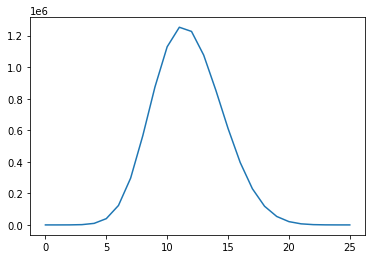

In [56]:
from matplotlib import pyplot as plt
plt.plot(lens)

In [57]:
lens = []

In [60]:
gen = gen1
while gen:
    #gens.append(gen)
    lens.append(len(gen))
    gen = reduce(gen, k)

KeyboardInterrupt: 

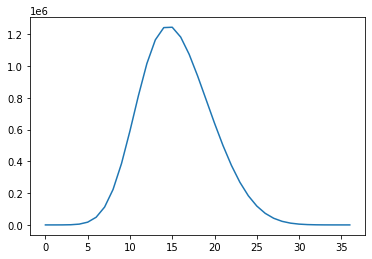

In [30]:
from matplotlib import pyplot as plt
plt.plot(lens)

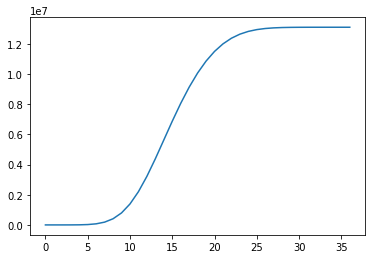

In [31]:
plt.plot([sum(lens[:i+1]) for i in range(len(lens))])

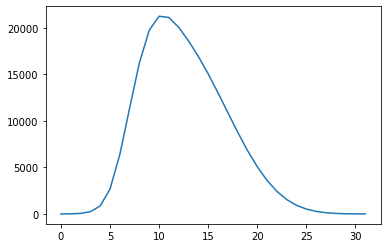

In [482]:
from matplotlib import pyplot as plt
plt.plot(lens)

In [483]:
sum(lens)

224656

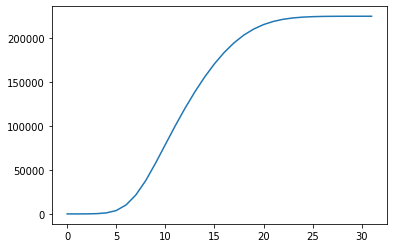

In [484]:
plt.plot([sum(lens[:i+1]) for i in range(len(lens))])

In [490]:
k = 20
n = 20

In [491]:
# Генерация порогов покупателей
Q = np.random.random_sample(size=[n, k])
lst = []
for i in range(n):
    for j in range(k):
        lst.append([Q[i][j], i, j, 0])
lst = sorted(lst, key = lambda x: x[0], reverse = True)

In [492]:
gen1 = clear(lst, k)
A = set(range(k))
for e in first_gen:
    if e[2] in A:
        A.remove(e[2])
        e[3] = 1 # число желающих купить
gen1 = [gen1]

In [493]:
lens = []
gens = []

In [494]:
gen = gen1
while gen:
    gens.append(gen)
    lens.append(len(gen))
    gen = reduce(gen, k)

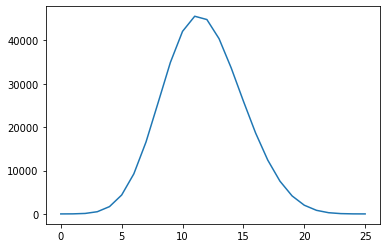

In [495]:
plt.plot(lens)

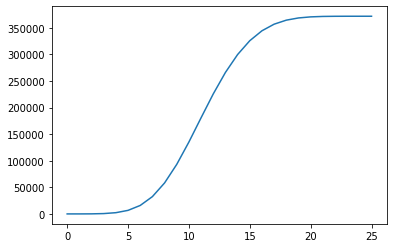

In [500]:
plt.plot([sum(lens[:i+1]) for i in range(len(lens))])

In [497]:
k = 25
n = 25

In [498]:
# Генерация порогов покупателей
Q = np.random.random_sample(size=[n, k])
lst = []
for i in range(n):
    for j in range(k):
        lst.append([Q[i][j], i, j, 0])
lst = sorted(lst, key = lambda x: x[0], reverse = True)

In [499]:
gen1 = clear(lst, k)
A = set(range(k))
for e in first_gen:
    if e[2] in A:
        A.remove(e[2])
        e[3] = 1 # число желающих купить
gen1 = [gen1]

In [501]:
lens = []
gens = []

In [ ]:
gen = gen1
while gen:
    gens.append(gen)
    lens.append(len(gen))
    gen = reduce(gen, k)

In [ ]:
n = 25
k = 25

In [5]:
Q = np.random.random_sample(size=[n, k])

NameError: name 'n' is not defined

In [6]:
def Q2lst(Q):
    lst = []
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if Q[i][j] != -1:
                lst.append([Q[i][j], i, j])
    return sorted(lst, key = lambda x: x[0], reverse = True)

In [17]:
x = []
y = []
for i in range(100):
    a = 0
    b = 0
    for _ in range(20):
        Q = np.random.random_sample(size=[i, i])
        lst = Q2lst(Q)
        a += len(lst)/20
        lst = clean(lst, i)
        b += len(lst)/20
    x.append(a)
    y.append(b)

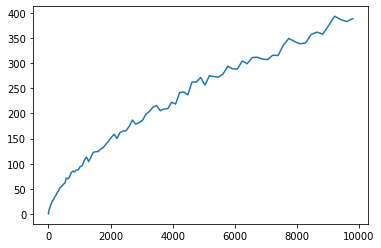

In [18]:
from matplotlib import pyplot as plt
plt.plot(x, y)

In [21]:
z = [np.log((k+1)/2)*(k+1) for k in range(100)]

In [15]:
z = [(k**2)/12 for k in range(100)]

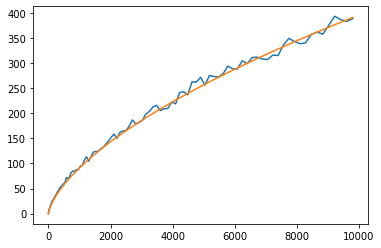

In [22]:
plt.plot(x, y)
plt.plot(x, z)

In [34]:
x = []
y = []
for i in range(200):
    Q = np.random.random_sample(size=[i+10, i])
    lst = Q2lst(Q)
    x.append(len(lst))
    lst = clear(lst, i)
    y.append(len(lst))

In [133]:
z = [sum([sum([1/(j+1) for j in range(i)]) for i in range(k)]) for k in range(200)]

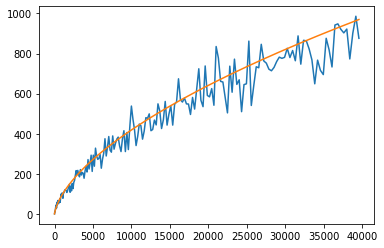

In [134]:
plt.plot(x, y)
plt.plot(x, z)

In [52]:
def lst2Q(lst, n, k):
    Q = -np.ones((n, k))
    for e in lst:
        Q[e[1]][e[2]] = e[0]
    return Q

In [63]:
def iterate(Q, A):
    s = 0
    for i, q in enumerate(Q[:, 0]):
        if q != -1 and i in A:
            A.remove(i)
            if Q.shape[1] > 1:
                s += iterate(Q[:, 1:], A)
            else:
                s += 1
            A.add(i)
    if s == 0:
        if Q.shape[1] > 1:
            s += iterate(Q[:, 1:], A)
        else:
            s = 1
    return s

In [81]:
def sort_Q(Q):
    def count(lst):
        return len([e for e in lst if e != -1])
    C = [(i, count(Q[:, i])) for i in range(Q.shape[1])]
    C = sorted(C, key = lambda x: x[1])
    return np.array([Q[:, c[0]] for c in C])

In [115]:
S = [0 for i in range(5, 30)]
for n in tqdm(range(50)):
    for k in range(5, 30):
        Q = np.random.random_sample(size=[k, k])
        lst = Q2lst(Q)
        lst = clear(lst, k)
        Q = lst2Q(lst, k, k)
        Q = sort_Q(Q)
        A = set(range(k))
        S[k-5] += iterate(Q, A)


In [116]:
S = [s/50 for s in S]

In [131]:
def prod(lst):
    p = 1
    for e in lst:
        p *= e
    return p

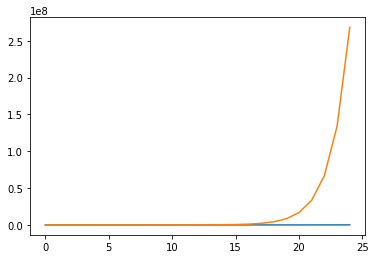

In [138]:
plt.plot(S)
plt.plot([2**(i-1) for i in range(5, 30)])

In [65]:
def exp_q(k, n):
    res = 1
    for i in range(k):
        res *= ((n-i)) / ((n-i) + 1)
    return res

In [67]:
exp_q(100, 100)

0.009900990099009884

In [64]:
n = 100
sum([1 + sum([exp_q(i, 100) - exp_q(j, 100) for j in range(i+1, n+1)]) for i in range(1, n+1)])

393.1051584195976

In [69]:
E = 0
for i in tqdm(range(50)):
    Q = np.random.random_sample(size=[100, 100])
    lst = Q2lst(Q)
    lst = clean(lst, i)
    E += lst[-1][0]/50
E

0.00013104588860968656

In [52]:
lst

[[0.974000007713309, 0, 2],
 [0.9713142229286106, 5, 6],
 [0.9677297748133252, 8, 2],
 [0.9489622062237123, 2, 3],
 [0.9254424367115787, 4, 0],
 [0.9249888527832225, 3, 0],
 [0.8932097002263298, 9, 9],
 [0.8659881484715627, 8, 6],
 [0.8612757292324198, 6, 5],
 [0.8382058902211618, 1, 3],
 [0.8120020891866876, 7, 9],
 [0.795351318097566, 7, 1],
 [0.791295557900004, 3, 1],
 [0.6607007598869193, 1, 0],
 [0.6213097178391405, 8, 7],
 [0.617456993272248, 3, 2],
 [0.6053575410874008, 1, 7],
 [0.5688104364340437, 3, 9],
 [0.5635314961342203, 3, 3],
 [0.5258982380889856, 3, 7],
 [0.5066747579925684, 1, 5],
 [0.3820570278804064, 3, 8],
 [0.3629353086413274, 1, 6],
 [0.2947500802617812, 1, 9],
 [0.26676647828302125, 1, 4]]